In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nyc.csv', index_col= 'id')
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.isna().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df.shape
# As we see last review and reviews per month are highly empty so dropping the entire column

(48895, 15)

In [5]:
df.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)
df.isna().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [6]:
df['name'].fillna(value = 'Anonymous', inplace = True)
df['host_name'].fillna(value = 'Anonymous', inplace = True)
df.isna().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
df['price'].median()

106.0

In [8]:
# Finding the number of unique values in the column
print("Finding the number of unique values to each column for making dummmies: ")
df.nunique()

Finding the number of unique values to each column for making dummmies: 


name                              47906
host_id                           37457
host_name                         11453
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
## Now using group by function
neighbourHood = df['price'].groupby(df['neighbourhood_group'])
rooms = df['price'].groupby(df['room_type'])
print("Mean value of airbnb for these neighbourhood group are: ")
print(neighbourHood.mean())
print("\n Mean value of room types for these room types are: ")
print(rooms.mean())

Mean value of airbnb for these neighbourhood group are: 
neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

 Mean value of room types for these room types are: 
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


<class 'list'>
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


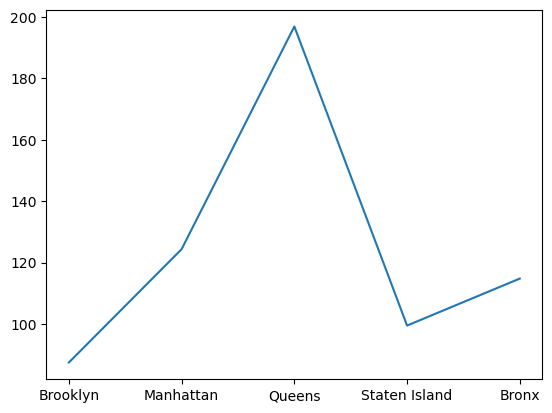

In [10]:
## Now plotting them for neighbourhood
neighbour = df.neighbourhood_group.unique()
neimean = (neighbourHood.mean()).to_list()
print(type(neimean))
print(neighbour)
plt.plot(neighbour,neimean)
#plt.xlabel("Neighbourhood")
#plt.ylabel("Neighbourhood price mean")

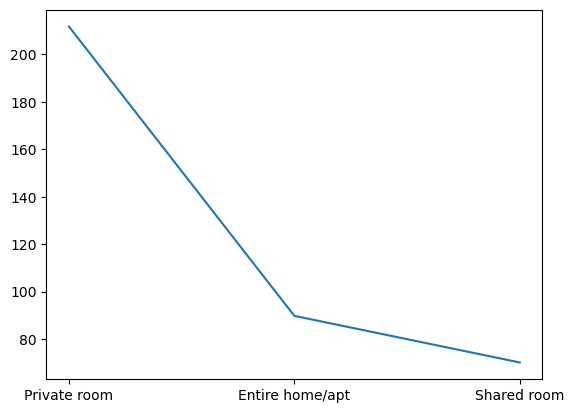

In [11]:
roomCost = df.room_type.unique()
roomMean = rooms.mean().to_list()
plt.plot(roomCost, roomMean)

In [12]:
## Making neighbourhood group and room_type to be dummies
dfRoom = pd.get_dummies(df['room_type'])
dfNG = pd.get_dummies(df['neighbourhood_group'])
## We know that after using get_dummies() we need to remove one column to reduce collinearity
#dfRoom.drop(['Entire home/apt'], axis = 1, inplace = True)
#dfNG.drop(['Bronx'], axis = 1, inplace = True)
print(dfRoom.head())
print(dfNG.head())

      Entire home/apt  Private room  Shared room
id                                              
2539            False          True        False
2595             True         False        False
3647            False          True        False
3831             True         False        False
5022             True         False        False
      Bronx  Brooklyn  Manhattan  Queens  Staten Island
id                                                     
2539  False      True      False   False          False
2595  False     False       True   False          False
3647  False     False       True   False          False
3831  False      True      False   False          False
5022  False     False       True   False          False


In [13]:
df.drop(['room_type'], axis = 1 ,inplace=True)
df.drop(['neighbourhood_group'], axis = 1, inplace= True)

In [14]:
dfDummy = pd.concat([dfRoom,dfNG], axis=1)
dfDummy

,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,
2539,False,True,False,False,True,False,False,False
2595,True,False,False,False,False,True,False,False
3647,False,True,False,False,False,True,False,False
3831,True,False,False,False,True,False,False,False
5022,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
36484665,False,True,False,False,True,False,False,False
36485057,False,True,False,False,True,False,False,False
36485431,True,False,False,False,False,True,False,False


In [15]:
# Now conconating into the original dataframe
df = pd.concat([df, dfDummy], axis=1)
encodedColumn = ['Entire home/apt','Private room','Shared room','Bronx','Brooklyn','Manhattan','Queens','Staten Island']
df.set_index = 'id'
df[encodedColumn] = df[encodedColumn].astype(int)
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,6,365,0,1,0,0,1,0,0,0
2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2,355,1,0,0,0,0,1,0,0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,1,365,0,1,0,0,0,1,0,0
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,1,194,1,0,0,0,1,0,0,0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,1,0,1,0,0,0,0,1,0,0


In [16]:
columnScale = ['latitude','longitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','Entire home/apt','Private room','Shared room','Bronx','Brooklyn','Manhattan','Queens','Staten Island']
data = df.loc[:,columnScale]
valueScale = df.loc[:, columnScale]
# Min-Max Scaling using NumPy
min_values = np.min(valueScale, axis=0)
max_values = np.max(valueScale, axis=0)
ScaledValue = (valueScale - min_values) / (max_values - min_values)
df.loc[:, columnScale] = ScaledValue

print("Now in this we have applied min-max scaling (feature scaling)")
print("The shape of the matrix is: ", df.shape )
df.head()
## In scaling we have not scaled price

Now in this we have applied min-max scaling (feature scaling)
The shape of the matrix is:  (48895, 19)


,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Kensington,0.357393,0.511921,149,0.000000,0.014308,0.015337,1.000000,0,1,0,0,1,0,0,0
2595,Skylit Midtown Castle,2845,Jennifer,Midtown,0.614199,0.490469,225,0.000000,0.071542,0.003067,0.972603,1,0,0,0,0,1,0,0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,0.748252,0.569257,150,0.001601,0.000000,0.000000,1.000000,0,1,0,0,0,1,0,0
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,0.448496,0.535649,89,0.000000,0.429253,0.000000,0.531507,1,0,0,0,1,0,0,0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,0.722820,0.565324,80,0.007206,0.014308,0.000000,0.000000,1,0,0,0,0,1,0,0


In [17]:

#Now again using correlation matrix to find correlation between elements for feature selection

# Calculate the correlation matrix
correlation_matrix = df.loc[:,columnScale].corr()

# Set a correlation threshold
correlation_threshold = 0.75

# Identify pairs of features with high correlation
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
ans = ''
# Remove one feature from each correlated pair
for feature1, feature2 in correlated_pairs:
    # Drop one of the features (you can choose based on your criteria)
    df.drop(feature2, axis=1, inplace=True)
    print("Dataframe removed after feature selection is: ",feature2)
    ans = feature2
# Display the DataFrame after removing correlated features
print("DataFrame after removing correlated features:")
print(df.shape)


Dataframe removed after feature selection is:  Private room
DataFrame after removing correlated features:
(48895, 18)


In [18]:
df.sort_values(by='id', ascending=True, inplace=True)
df.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Kensington,0.357393,0.511921,149,0.000000,0.014308,0.015337,1.000000,0,0,0,1,0,0,0
2595,Skylit Midtown Castle,2845,Jennifer,Midtown,0.614199,0.490469,225,0.000000,0.071542,0.003067,0.972603,1,0,0,0,1,0,0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,0.748252,0.569257,150,0.001601,0.000000,0.000000,1.000000,0,0,0,0,1,0,0
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,0.448496,0.535649,89,0.000000,0.429253,0.000000,0.531507,1,0,0,1,0,0,0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,0.722820,0.565324,80,0.007206,0.014308,0.000000,0.000000,1,0,0,0,1,0,0


### Now we shall be implementing PCA using numpy and pandas

In [19]:
data.drop([ans], axis= 1, inplace=True)
data.head()
# Now on this data we shall be implementing PCA

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,,,,,,
2539,40.64749,-73.97237,1,9,6,365,0,0,0,1,0,0,0
2595,40.75362,-73.98377,1,45,2,355,1,0,0,0,1,0,0
3647,40.80902,-73.94190,3,0,1,365,0,0,0,0,1,0,0
3831,40.68514,-73.95976,1,270,1,194,1,0,0,1,0,0,0
5022,40.79851,-73.94399,10,9,1,0,1,0,0,0,1,0,0


In [20]:
# Normalise the data
data = (data - data.mean()) / data.std()
data.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
id,,,,,,,,,,,,,
2539,-1.493834,-0.437648,-0.293993,-0.320410,-0.034716,1.916231,-1.040123,-0.155886,-0.151069,1.196693,-0.891824,-0.362031,-0.087676
2595,0.452431,-0.684632,-0.293993,0.487660,-0.156103,1.840256,0.961405,-0.155886,-0.151069,-0.835619,1.121275,-0.362031,-0.087676
3647,1.468384,0.222494,-0.196482,-0.522428,-0.186450,1.916231,-1.040123,-0.155886,-0.151069,-0.835619,1.121275,-0.362031,-0.087676
3831,-0.803389,-0.164448,-0.293993,5.538099,-0.186450,0.617059,0.961405,-0.155886,-0.151069,1.196693,-0.891824,-0.362031,-0.087676
5022,1.275647,0.177214,0.144805,-0.320410,-0.186450,-0.856856,0.961405,-0.155886,-0.151069,-0.835619,1.121275,-0.362031,-0.087676


In [21]:
# Calculate the covariance matrix
cov_mat = data.cov()
cov_mat

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
latitude,1.000000,0.084788,0.024869,-0.015389,0.019517,-0.010983,-0.005712,0.004473,0.330669,-0.672932,0.590639,0.017145,-0.190894
longitude,0.084788,1.000000,-0.062747,0.059094,-0.114713,0.082731,-0.192143,0.029812,0.221315,0.017735,-0.433531,0.622749,-0.291841
minimum_nights,0.024869,-0.062747,1.000000,-0.080116,0.127960,0.144303,0.074900,-0.004218,-0.018186,-0.039658,0.067362,-0.032629,-0.009400
number_of_reviews,-0.015389,0.059094,-0.080116,1.000000,-0.072376,0.172028,-0.010087,-0.023355,0.009258,0.017414,-0.045820,0.035967,0.015088
calculated_host_listings_count,0.019517,-0.114713,0.127960,-0.072376,1.000000,0.225701,0.112193,-0.011737,-0.022511,-0.123234,0.152842,-0.033881,-0.012838
availability_365,-0.010983,0.082731,0.144303,0.172028,0.225701,1.000000,-0.006804,0.058294,0.060806,-0.079671,-0.005434,0.087113,0.057885
Entire home/apt,-0.005712,-0.192143,0.074900,-0.010087,0.112193,-0.006804,1.000000,-0.162144,-0.052092,-0.073905,0.160082,-0.108505,-0.008391
Shared room,0.004473,0.029812,-0.004218,-0.023355,-0.011737,0.058294,-0.162144,1.000000,0.031041,-0.017467,-0.009169,0.026693,0.000233
Bronx,0.330669,0.221315,-0.018186,0.009258,-0.022511,0.060806,-0.052092,0.031041,1.000000,-0.126239,-0.134730,-0.054693,-0.013245
Brooklyn,-0.672932,0.017735,-0.039658,0.017414,-0.123234,-0.079671,-0.073905,-0.017467,-0.126239,1.000000,-0.745240,-0.302527,-0.073265


In [22]:
# Now calculating eigenvectors and eigen values
eig_values, eig_vectors = np.linalg.eig(cov_mat)

print("The eigen values are: \n", eig_values)
print("The eigen vectors are: \n", eig_vectors)


The eigen values are: 
 [ 2.47020448e+00  2.00057801e+00  2.07846670e-01  2.88740094e-01
  1.35494009e+00  6.31688924e-01  8.01428568e-01  8.71652371e-01
  9.97478244e-01  1.16364748e+00  1.11814217e+00  1.09365290e+00
 -2.97067975e-16]
The eigen vectors are: 
 [[ 4.85208267e-01  3.10157000e-01  5.85649666e-01  5.09403972e-01
   1.82969965e-01 -3.62028843e-03  5.01943446e-02 -5.36679399e-02
  -1.05375347e-02 -2.84092222e-02  1.11015852e-01  1.17320745e-01
   9.95208208e-16]
 [-2.31768028e-01  5.84736663e-01 -5.51052437e-01  5.11970562e-01
  -2.47682276e-02  1.55106910e-03 -3.50598340e-02  1.06973137e-02
   5.83680694e-03  1.88436541e-01  2.52034530e-02  2.13743546e-02
   1.63939340e-16]
 [ 8.88596351e-02 -6.13629256e-02 -2.06814187e-02 -1.16823855e-03
  -4.00711984e-01 -2.35565545e-01  1.53052656e-02 -7.60908942e-01
  -1.15376359e-01  2.08714343e-01  3.47477523e-01 -1.22546200e-01
  -2.78939504e-16]
 [-5.21807110e-02  7.77422650e-02 -2.83307262e-03 -1.43380879e-02
  -1.53335585e-01 -4.

In [23]:
## Now sorting of eigenvectors
#The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
e_indices = np.argsort(eig_values)[::-1]
eigenvectors_sorted = eig_vectors[:,e_indices]
eigenvectors_sorted

array([[ 4.85208267e-01,  3.10157000e-01,  1.82969965e-01,
        -2.84092222e-02,  1.11015852e-01,  1.17320745e-01,
        -1.05375347e-02, -5.36679399e-02,  5.01943446e-02,
        -3.62028843e-03,  5.09403972e-01,  5.85649666e-01,
         9.95208208e-16],
       [-2.31768028e-01,  5.84736663e-01, -2.47682276e-02,
         1.88436541e-01,  2.52034530e-02,  2.13743546e-02,
         5.83680694e-03,  1.06973137e-02, -3.50598340e-02,
         1.55106910e-03,  5.11970562e-01, -5.51052437e-01,
         1.63939340e-16],
       [ 8.88596351e-02, -6.13629256e-02, -4.00711984e-01,
         2.08714343e-01,  3.47477523e-01, -1.22546200e-01,
        -1.15376359e-01, -7.60908942e-01,  1.53052656e-02,
        -2.35565545e-01, -1.16823855e-03, -2.06814187e-02,
        -2.78939504e-16],
       [-5.21807110e-02,  7.77422650e-02, -1.53335585e-01,
        -3.15001479e-01, -3.67328557e-01,  5.49189642e-01,
         4.37413914e-01, -2.04095374e-01, -4.63257895e-02,
        -4.43407836e-01, -1.43380879e

In [24]:
## Now choosing principal components
newList = [i for i in eig_values]
#newList.sort(reverse=True)
#newList

sumList = list()
for i in range(len(newList)):
    sumList.append((newList[i]/sum(newList))*100)
print(newList)
print(sumList)
columnScale.remove('Private room')

[2.470204476902574, 2.0005780066653953, 0.20784666968837198, 0.2887400939907803, 1.3549400929128266, 0.631688924497881, 0.8014285676276206, 0.8716523713725232, 0.9974782441144422, 1.1636474793213853, 1.1181421688331434, 1.0936529040740328, -2.970679745661128e-16]
[19.00157289924914, 15.389061589732652, 1.59882053606428, 2.2210776460827586, 10.422616099328652, 4.859145573060259, 6.164835135596618, 6.705018241326598, 7.672909570110517, 8.951134456317677, 8.60109360640815, 8.412714646722696, -2.2851382658930038e-15]


In [25]:
eigenData = {'name': columnScale, 'eigenValue' : newList , 'eigenValuePercentage' : sumList}
dfEig = pd.DataFrame(eigenData)
dfEig.sort_values(by='eigenValuePercentage',ascending=False,inplace=True)
dfEig

,name,eigenValue,eigenValuePercentage
0,latitude,2.470204e+00,1.900157e+01
1,longitude,2.000578e+00,1.538906e+01
4,calculated_host_listings_count,1.354940e+00,1.042262e+01
9,Brooklyn,1.163647e+00,8.951134e+00
10,Manhattan,1.118142e+00,8.601094e+00
11,Queens,1.093653e+00,8.412715e+00
8,Bronx,9.974782e-01,7.672910e+00
7,Shared room,8.716524e-01,6.705018e+00
6,Entire home/apt,8.014286e-01,6.164835e+00
5,availability_365,6.316889e-01,4.859146e+00


<BarContainer object of 12 artists>

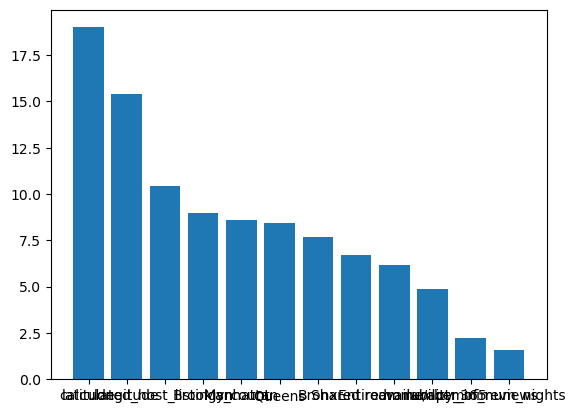

In [26]:
myValues = dfEig['eigenValuePercentage']
columnName = dfEig['name']
plt.bar(columnName[0:len(myValues)-1], myValues[0:len(myValues)-1])

True
['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'Entire home/apt', 'Shared room', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens']


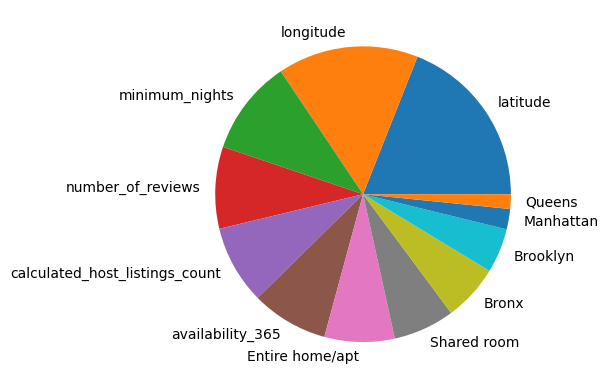

In [27]:
myLabels = columnScale
myLabels.pop()
values = dfEig['eigenValuePercentage'].to_numpy()
values = np.delete(values, len(values) - 1)
print(len(values) == len(myLabels))
plt.pie(values, labels= myLabels)
print(myLabels)

In [28]:
print("This Pie Chart tells about the importance of the feature in the dataset")

This Pie Chart tells about the importance of the feature in the dataset
